In [1]:
import fluorCalc as fc
import numpy as np
import matplotlib.pyplot as plt

# Example: 1000 ppm P in MoO<sub>2</sub>

## 1. Setting up the experiment

<span style="font-size:18px;">Let us consider a user who wants to predict fluorescence count rates at the P K-edge for MoO<sub>2</sub> which contains 1000 ppm (0.1%) of P. Recalling their general chemistry and with pen and paper in hand, they'll start by calculating the stoichimetric ratio coefficient of P in their sample, like so:</span>

$\Huge{   m_{P_xMoO_2}\frac{1}{1000} = m_{P_x}   }$

$\Huge{   m_{P_xMoO_2}\frac{999}{1000} = m_{MoO_2}   }$

$\Huge{   m_{MoO_2} \cdot \frac{1}{999} = m_{P_x}   }$

$\Huge{   (1\text{ mol} \cdot 95.95 \frac{\text{g}}{\text{mol}} + 2\text{ mol} \cdot 16\frac{g}{mol}) \cdot \frac{1}{999} = x\text{ mol} \cdot 30.97 \frac{\text{g}}{\text{mol}}   }$

$\Huge{   x = (1\text{ mol} \cdot 95.95 \frac{\text{g}}{\text{mol}} + 2\text{ mol} \cdot 16\frac{g}{mol}) \cdot \frac{1}{999} \cdot \frac{1}{30.97\text{ g}}  }$

In [2]:
P_coeff = ((1 * 95.95 + 2 * 16)
            / 999
            / 30.97)
print(f"The stoichiomentric coefficient of 1000 ppm P in MoO2 is {P_coeff:.5f}")

The stoichiomentric coefficient of 1000 ppm P in MoO2 is 0.00414


<span style="font-size:18px;">They will then prepare their sample composition as a Python dictionary, where the keys specify elements and values specify stoichiometry.</span>

In [3]:
P_Mo_O2_composition = {
    'Mo': 1,
    'O': 2,
    'P': 0.00414
}

<span style="font-size:18px;">If the user prefers, they could have also prepared their sample composition dictionary like so:</span>

In [4]:
P_Mo_O2_composition = {}
P_Mo_O2_composition['Mo'] = 1
P_Mo_O2_composition['O'] = 2
P_Mo_O2_composition['P'] = 0.00414

<span style="font-size:18px;">Either is acceptable. The user can then prepare an `Experimental_Configuration` object which basically encodes the relevant parameters of an XAFS experiment needed for a calculation.</span>

In [5]:
P_Mo_O2_setup = fc.Experimental_Configuration(
        P_Mo_O2_composition,     # Composition dictionary
         6.47 * 0.5,             # Density (g/mL)
         'P', 'K', 'Ka',         # Absorbing element, Edge, Fluorescence line
         45,                     # X-ray beam angle of incidence (in degrees)
         np.sqrt(170/4/np.pi),   # Radius of detector window (in mm)
         3, 1,                   # Beam width (mm), beam height (mm)
         7.7E9,                  # Beam intensity (photons/second)
         10)                     # Distance from detector to sample surface (mm)

## 2. Computing the count rate

<span style="font-size:18px;">The user can then pass their `Experimental_Configuration` object into the `xafs_count_rate` function. They can use the keyword argument `nmc` to specify the number of phase space sample points used by the Monte Carlo integral. Higher `nmc` values will compute the integrals more precisely, but will take longer.</span>

In [6]:
P_Mo_O2_result = fc.xafs_count_rate(P_Mo_O2_setup, nmc = 1000)

Expected count rate: 2.867e+03 photons per second
Using nmc = 1000
Estimated error = 2.27e+02 = 7.9%
Crude count rate: 3.087e+03 photons per second, difference of 7.65%


<span style="font-size:18px;">Because the Monte Carlo integral only sampled 1000 points, their estimated error is quite large. The user could rerun the calculation using a higher number of points. If they omit any `nmc` argument, the calculation will default to sampling 50,000 points. Note the the error reported is only the intrinsic uncertainty introduced via the Monte Carlo integration method.</span>

In [7]:
P_Mo_O2_result = fc.xafs_count_rate(P_Mo_O2_setup)

Expected count rate: 3.030e+03 photons per second
Using nmc = 50000
Estimated error = 3.37e+01 = 1.11%
Crude count rate: 3.087e+03 photons per second, difference of 1.86%


<span style="font-size:18px;">If a calculation was particularly expensive, they may want to save it to a file. They can save their file as a JSON with the `save()` method.</span>

In [8]:
P_Mo_O2_result.save("1000_ppm_P_Mo_Mo2")

<span style="font-size:18px;">Calculation results can also be loaded from JSON files.</spawn>

In [9]:
loaded_P_Mo_O2_result = fc.load_result("1000_ppm_P_Mo_Mo2")
loaded_P_Mo_O2_result.report()

Expected count rate: 3.030e+03 photons per second
Using nmc = 50000
Estimated error = 3.37e+01 = 1.11%
Crude count rate: 3.087e+03 photons per second, difference of 1.86%


## Predicting an optimal angle

<span style="font-size:18px;">Suppose that the user would like to predict what the optimal angle of incidence for their exerimental configuration is. They can use the `angle_sweep` class to do so. The user will check angles between 1 and 45 degrees with a sampling granularity of 0.5 degrees. They might also decide to change `nmc` to a smaller number, since they're effectively setting up 90 different calculations that will all have to run in series.</span>

In [10]:
P_Mo_O2_sweep = fc.angle_sweep(
    1, 45,           # Lower bound of angles, upper bound of angles
    0.5,             # Sapling granularity (in other words, step size)
    P_Mo_O2_setup,   # Experimental configuration
    nmc = 1000       # Number of points sampled by the Monte Carlo integral
)

<span style="font-size:18px;">The user can plot the results of the angle sweep by invoking the `plot_result()` method of the `angle_sweep`.</span>

<span style="font-size:18px;">Well that's looking a little barren. Let's annotate it. </span>

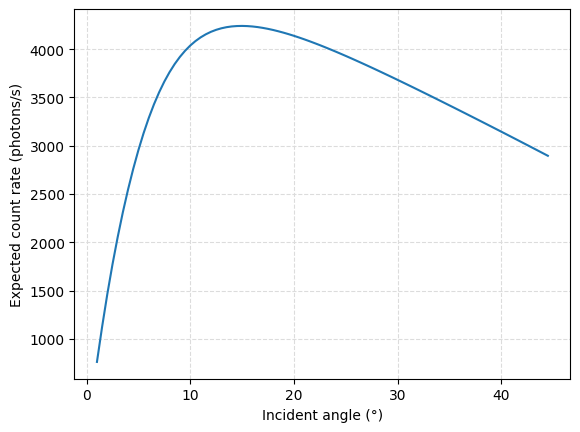

In [11]:
P_Mo_O2_sweep.plot_result()
plt.xlabel('Incident angle (°)')
plt.ylabel('Expected count rate (photons/s)')
plt.grid(color = 'gainsboro', linestyle = 'dashed')

<span style="font-size:18px;">The user can access the optimal angle and max count rates directly as properties of `angle_sweep` object</span>

In [12]:
print(f"Max count rate: {P_Mo_O2_sweep.max_count_rate:.2e} photons/second")
print(f"Optimal angle: {P_Mo_O2_sweep.optimal_angle} °")

Max count rate: 4.24e+03 photons/second
Optimal angle: 15.0 °


<span style="font-size:18px;">Alternatively the user can call the `report_optimal_angle()` method.</span>

In [13]:
P_Mo_O2_sweep.report_optimal_angle()

Maximum flux of 4.241e+03 at a 15.0° angle of incidence
